# Exercicio 2

O objetivo deste exercício é testar as técnicas de subamostragem e sobreamostragem utilizando outra base de dados

Carregue a base de dados csv_result-ebay_confianca_completo.csv, que é uma base de dados que utilizei no meu pós-doutorado para prever confiança de usuários baseado em traços de personalidade extraídos de textos

A classe é o atributo reputation, que pode ser reputação boa ou reputação ruim

Utilize o algoritmo Random Forest e faça os três testes conforme o exemplo anterior. O algoritmo Naïve Bayes não terá um bom desempenho nesta base de dados, por isso precisamos utilizar o Random Forest que é um algoritmo baseado em árvores de decisão. A ideia de utilização é a mesma, e no link a seguir você pode verificar a documentação: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Na próxima aula você pode assistir o vídeo com a solução

Bom trabalho!

# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Carregando arquivo

In [2]:
df = pd.read_csv('csv_result-ebay_confianca_completo.csv')
df

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,49,0,N,6.069133,0.5,0,1.931712,0.5,1,5.616294,...,0.669362,0.602225,0.711554,0.644777,0.666970,0.742045,0.605412,0.650072,0.828953,Bom
5804,60,0,N,5.056324,0.5,0,3.152737,0.5,1,5.072437,...,0.698962,0.597975,0.690498,0.614929,0.614349,0.747452,0.640656,0.654348,0.801171,Ruim
5805,78,0,N,5.095499,0.4,0,3.535562,0.5,1,4.692843,...,0.710999,0.692540,0.728816,0.622679,0.708117,0.795567,0.697466,0.673904,0.832073,Bom
5806,95,0,N,4.780761,0.4,0,3.198620,0.5,1,4.563306,...,0.724970,0.718304,0.722504,0.573924,0.668312,0.805183,0.770677,0.710048,0.819924,Ruim


In [3]:
#df.info()

# Tratamento dos dados

In [4]:
set(df['blacklist'])

{'B', 'N'}

In [5]:
def blacklist(column):
    if column == 'B':
        return 1
    else:
        return 0

In [6]:
set(df['reputation'])

{'Bom', 'Ruim'}

In [7]:
def reputacao(column):
    if column == 'Bom':
        return 1
    elif column == 'Ruim':
        return 0

In [8]:
df['blacklist'] = df['blacklist'].apply(lambda x: blacklist(x))
df['reputation'] = df['reputation'].apply(lambda x: reputacao(x))
df.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,0,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,1
3,0,56,0,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,1
4,0,50,0,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,1
5,72,0,0,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,1
6,76,0,0,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5806 entries, 2 to 5807
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   feedbacks                5806 non-null   int64  
 1   reviews                  5806 non-null   int64  
 2   blacklist                5806 non-null   int64  
 3   mextraversion            5806 non-null   float64
 4   cextraversion            5806 non-null   float64
 5   sextraversion            5806 non-null   int64  
 6   mneuroticism             5806 non-null   float64
 7   cneuroticism             5806 non-null   float64
 8   sneuroticism             5806 non-null   int64  
 9   mconscientiousness       5806 non-null   float64
 10  cconscientiousness       5806 non-null   float64
 11  sconscientiousness       5806 non-null   int64  
 12  magreeableness           5806 non-null   float64
 13  cagreeableness           5806 non-null   float64
 14  sagreeableness          

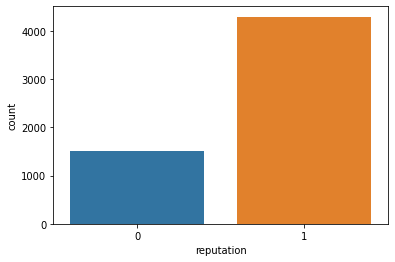

In [10]:
sns.countplot(df.reputation)

# Realizando subamostragem e sobreamostragem

## Verificando resultados sem mexer nos dados

In [11]:
# Separando dados em X e Y
x = df.drop('reputation',axis=1)
y = df['reputation']
# Separando em Treino e Teste
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3) # split

In [12]:
# Vendo o numero de linhas de cada
print('Dados treino:')
print(x_train.shape,y_train.shape)
print('\nDados de Teste:')
print(x_test.shape,y_test.shape)
print('\nComo esta distribuido o y:')
print(np.unique(y,return_counts=True))

Dados treino:
(4064, 74) (4064,)

Dados de Teste:
(1742, 74) (1742,)

Como esta distribuido o y:
(array([0, 1]), array([1507, 4299]))


In [13]:
forest = RandomForestClassifier()
forest.fit(x_train,y_train)

RandomForestClassifier()

In [14]:
predict = forest.predict(x_test)
print(confusion_matrix(predict,y_test))
print(classification_report(predict,y_test))

[[  25   11]
 [ 457 1249]]
              precision    recall  f1-score   support

           0       0.05      0.69      0.10        36
           1       0.99      0.73      0.84      1706

    accuracy                           0.73      1742
   macro avg       0.52      0.71      0.47      1742
weighted avg       0.97      0.73      0.83      1742



## Subamostragem

In [15]:
# Parametrizando a funcao
sub_am = NearMiss()

# Separando dados em X e Y
x = df.drop('reputation',axis=1)
y = df['reputation']

# Aplicando o Undersampling
x,y = sub_am.fit_sample(x,y)

print('Como esta distribuido o y:')
print(np.unique(y,return_counts=True),'\n')

# Realizando split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3) # split

# Using Random Forest
forest = RandomForestClassifier()
forest.fit(x_train,y_train) # train

predict = forest.predict(x_test)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

Como esta distribuido o y:
(array([0, 1]), array([1507, 1507])) 

[[311 148]
 [124 322]]
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       459
           1       0.69      0.72      0.70       446

    accuracy                           0.70       905
   macro avg       0.70      0.70      0.70       905
weighted avg       0.70      0.70      0.70       905



# Sobreamostragem

In [16]:
# Parametrizando a funcao
sob_am = SMOTE()

# Separando dados em X e Y
x = df.drop('reputation',axis=1)
y = df['reputation']

# Aplicando o Undersampling
x,y = sob_am.fit_sample(x,y)

print('Como esta distribuido o y:')
print(np.unique(y,return_counts=True),'\n')

# Realizando split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3) # split

# Using Random Forest
forest = RandomForestClassifier()
forest.fit(x_train,y_train) # train

predict = forest.predict(x_test)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

Como esta distribuido o y:
(array([0, 1]), array([4299, 4299])) 

[[1018  256]
 [ 278 1028]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1274
           1       0.80      0.79      0.79      1306

    accuracy                           0.79      2580
   macro avg       0.79      0.79      0.79      2580
weighted avg       0.79      0.79      0.79      2580

